In [1]:
__depends__ = []
__dest__ = [
    "../figures/linear_v_logarithmic_equations.pdf",
    "../sections/linear_v_logarithmic_table.tex",
]

Cell above is scons stuff to make sure our dependency tree work. We put a renaming in the cell below to make it clearer what is what.

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
LINEAR_V_LOGARITHMIC_FIGURE = __dest__[0]
LINEAR_V_LOGARITHMIC_TEX = __dest__[1]

<IPython.core.display.Javascript object>

# Linear vs logarithmic equations

In this notebook we explore the difference between the linear and logarithmic equations and how it varies as a function of $\alpha$ and $\gamma$.

## Imports

In [4]:
import warnings

import numpy as np
import pandas as pd
from openscm.units import _unit_registry as unit_registry

<IPython.core.display.Javascript object>

## Plotting config

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns

from utils_plotting import (
    COLOURS,
    SCATTER_UNDER_LINE_ALPHA,
    SAVE_KWARGS,
    setup,
    show_all_matplotlib_fonts_in_notebook,
    get_annotation_for_panel_number,
)

setup()

<IPython.core.display.Javascript object>

## Exploring the difference between the two formulations

In [6]:
def calc_warming_sr15_framework(c, tcre):
    return c * tcre


def inverse_calc_warming_sr15_framework(t, tcre):
    return t / tcre

<IPython.core.display.Javascript object>

In [7]:
def calc_warming_our_framework(c, t_2x, c_2x, alpha, gamma):
    return (
        gamma
        * t_2x
        * np.log(1 + (c / alpha).magnitude)
        / np.log(1 + (c_2x / alpha).magnitude)
    )


def inverse_calc_warming_our_framework(t, t_2x, c_2x, alpha, gamma):
    return alpha * (
        np.exp(t / (gamma * t_2x) * np.log(1 + (c_2x / alpha).magnitude)) - 1
    )

<IPython.core.display.Javascript object>

In [15]:
hist_co2_warming = 1.0 * unit_registry("K")
t_2x = 2 * unit_registry("K")
c_2x = 3667 * unit_registry("GtCO2")
gamma = 1 * unit_registry("dimensionless")

conv_style_label = "Conversion to\ncumulative\nCO$_2$ emissions"

example_t_levels = np.linspace(0, 3, 300) * unit_registry("K")
cumulative_co2_label = "cumulative_co2_emissions"
cumulative_co2_delta_label = "cumulative_co2_emissions_delta"
cumulative_co2_rel_to_today_label = "cumulative_co2_emissions_rel_to_today"
cumulative_co2_rel_to_today_delta_label = "cumulative_co2_emissions_rel_to_today_delta"

transient_co2_warming_label = "transient_co2_warming"
transient_co2_warming_rel_to_today_label = "transient_co2_warming_rel_to_today"
transient_co2_warming_delta_label = "transient_co2_warming_delta"
transient_co2_warming_rel_to_today_delta_label = (
    "transient_co2_warming_rel_to_today_delta"
)
pdf = []

sr15_emms = inverse_calc_warming_sr15_framework(example_t_levels, t_2x / c_2x)
sr15_emms_rel_to_today = inverse_calc_warming_sr15_framework(
    example_t_levels + hist_co2_warming, t_2x / c_2x
) - inverse_calc_warming_sr15_framework(hist_co2_warming, t_2x / c_2x)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tmp = pd.DataFrame(
        np.vstack(
            [
                example_t_levels.magnitude,
                sr15_emms.magnitude,
                (sr15_emms - sr15_emms).magnitude,
                sr15_emms_rel_to_today.magnitude,
                (sr15_emms_rel_to_today - sr15_emms_rel_to_today).magnitude,
            ]
        ).T,
        columns=[
            transient_co2_warming_label,
            cumulative_co2_label,
            cumulative_co2_delta_label,
            cumulative_co2_rel_to_today_label,
            cumulative_co2_rel_to_today_delta_label,
        ],
    )

tmp[conv_style_label] = "Linear"
tmp["alpha"] = "N/A"
tmp["gamma"] = "N/A"
tmp["$\\alpha$ / C$_{2\\times}$"] = "N/A"
pdf.append(tmp)

for alpha in c_2x * np.array([-2, 1.2, 2, 4, 10, 100]):
    our_emms = inverse_calc_warming_our_framework(
        example_t_levels, t_2x, c_2x, alpha, gamma
    )
    our_emms_rel_to_today = inverse_calc_warming_our_framework(
        example_t_levels + hist_co2_warming, t_2x, c_2x, alpha, gamma
    ) - inverse_calc_warming_our_framework(hist_co2_warming, t_2x, c_2x, alpha, gamma)
    tmp = pd.DataFrame(
        np.vstack(
            [
                example_t_levels.magnitude,
                our_emms.magnitude,
                (our_emms - sr15_emms).magnitude,
                our_emms_rel_to_today.magnitude,
                (our_emms_rel_to_today - sr15_emms_rel_to_today).magnitude,
            ]
        ).T,
        columns=[
            transient_co2_warming_label,
            cumulative_co2_label,
            cumulative_co2_delta_label,
            cumulative_co2_rel_to_today_label,
            cumulative_co2_rel_to_today_delta_label,
        ],
    )
    tmp["alpha"] = alpha
    tmp["$\\alpha$ / C$_{2\\times}$"] = (alpha / c_2x).magnitude
    tmp["gamma"] = gamma
    tmp[conv_style_label] = "Non-linear"
    pdf.append(tmp)

pdf = pd.concat(pdf, sort=True)
pdf.head()

$\alpha$ / C$_{2\times}$ Conversion to\ncumulative\nCO$_2$ emissions alpha  \
0                      N/A                                      Linear   N/A   
1                      N/A                                      Linear   N/A   
2                      N/A                                      Linear   N/A   
3                      N/A                                      Linear   N/A   
4                      N/A                                      Linear   N/A   

   cumulative_co2_emissions  cumulative_co2_emissions_delta  \
0                  0.000000                             0.0   
1                 18.396321                             0.0   
2                 36.792642                             0.0   
3                 55.188963                             0.0   
4                 73.585284                             0.0   

   cumulative_co2_emissions_rel_to_today  \
0                               0.000000   
1                              18.396321   
2                              36.792642   
3                              55.188963   
4                              73.585284   

   cumulative_co2_emissions_rel_to_today_delta gamma  transient_co2_warming  
0                                          0.0   N/A               0.000000  
1                                          0.0   N/A               0.010033  
2                                          0.0   N/A               0.020067  
3                                          0.0   N/A               0.030100  
4                                          0.0   N/A               0.040134

<IPython.core.display.Javascript object>

In [16]:
pdf.tail()

$\alpha$ / C$_{2\times}$ Conversion to\ncumulative\nCO$_2$ emissions  \
295                      100                                  Non-linear   
296                      100                                  Non-linear   
297                      100                                  Non-linear   
298                      100                                  Non-linear   
299                      100                                  Non-linear   

                 alpha  cumulative_co2_emissions  \
295  366700.0 gigatCO2               5439.915006   
296  366700.0 gigatCO2               5458.491967   
297  366700.0 gigatCO2               5477.069856   
298  366700.0 gigatCO2               5495.648673   
299  366700.0 gigatCO2               5514.228417   

     cumulative_co2_emissions_delta  cumulative_co2_emissions_rel_to_today  \
295                       13.000290                            5467.046920   
296                       13.180931                            5485.716535   
297                       13.362499                            5504.387083   
298                       13.544994                            5523.058562   
299                       13.728417                            5541.730973   

     cumulative_co2_emissions_rel_to_today_delta            gamma  \
295                                    40.132204  1 dimensionless   
296                                    40.405498  1 dimensionless   
297                                    40.679725  1 dimensionless   
298                                    40.954883  1 dimensionless   
299                                    41.230973  1 dimensionless   

     transient_co2_warming  
295               2.959866  
296               2.969900  
297               2.979933  
298               2.989967  
299               3.000000

<IPython.core.display.Javascript object>

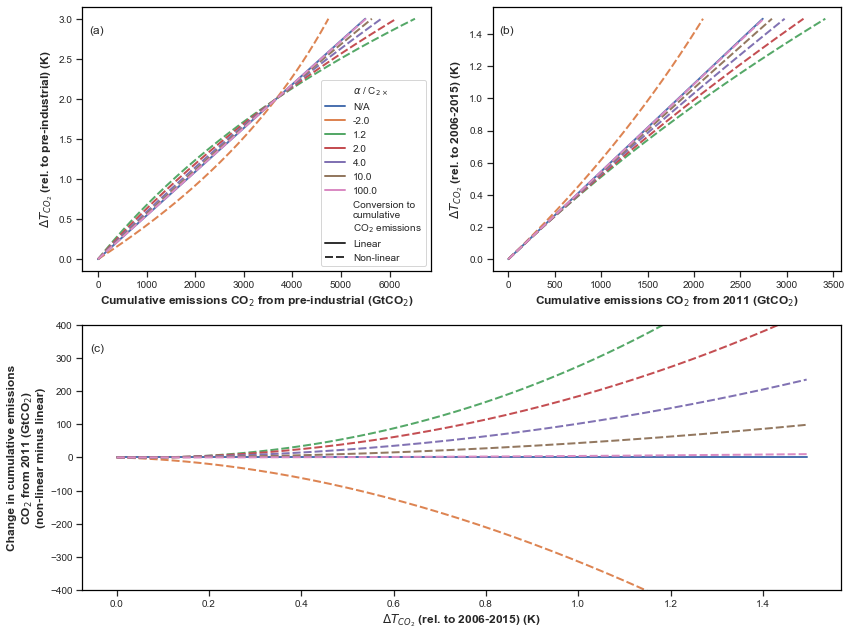

<IPython.core.display.Javascript object>

In [18]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(221)
sns.lineplot(
    data=pdf,
    x=cumulative_co2_label,
    y=transient_co2_warming_label,
    hue="$\\alpha$ / C$_{2\\times}$",
    style=conv_style_label,
    ax=ax,
)
ax.set_xlabel("Cumulative emissions CO$_2$ from pre-industrial (GtCO$_2$)")
ax.set_ylabel("$\\Delta T_{CO_2}$ (rel. to pre-industrial) (K)")
# ax.axhline(hist_co2_warming.magnitude, color="gray", alpha=0.8)
ax.annotate("(a)", xy=(0.02, 0.9), xycoords="axes fraction")

pdf_here = pdf[pdf[transient_co2_warming_label] < 1.5]

ax = fig.add_subplot(222)
sns.lineplot(
    data=pdf_here,
    x=cumulative_co2_rel_to_today_label,
    y=transient_co2_warming_label,
    hue="$\\alpha$ / C$_{2\\times}$",
    style=conv_style_label,
    ax=ax,
)
ax.get_legend().remove()
ax.set_xlabel("Cumulative emissions CO$_2$ from 2011 (GtCO$_2$)")
ax.set_ylabel("$\\Delta T_{CO_2}$ (rel. to 2006-2015) (K)")
ax.annotate("(b)", xy=(0.02, 0.9), xycoords="axes fraction")

ax = fig.add_subplot(212)
sns.lineplot(
    data=pdf_here,
    x=transient_co2_warming_label,
    y=cumulative_co2_rel_to_today_delta_label,
    hue="$\\alpha$ / C$_{2\\times}$",
    style=conv_style_label,
    ax=ax,
)
ax.get_legend().remove()
ax.set_ylim([-400, 400])
ax.set_xlabel("$\\Delta T_{CO_2}$ (rel. to 2006-2015) (K)")
ax.set_ylabel(
    "Change in cumulative emissions\nCO$_2$ from 2011 (GtCO$_2$)\n(non-linear minus linear)"
)
ax.annotate("(c)", xy=(0.01, 0.9), xycoords="axes fraction")

plt.tight_layout()

# ax = fig.add_subplot(122)
# sns.lineplot(
#     data=pdf,
#     x=transient_co2_warming_label,
#     y=cumulative_co2_delta_label,
#     hue="$\\alpha$ / C$_{2\\times}$",
#     style="Framework",
#     ax=ax,
# )
fig.savefig(LINEAR_V_LOGARITHMIC_FIGURE, **SAVE_KWARGS)

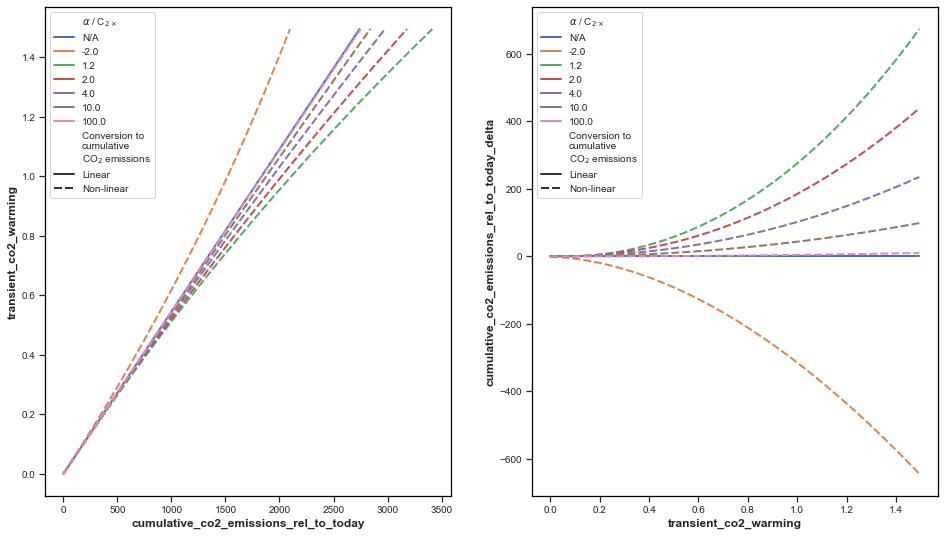

<IPython.core.display.Javascript object>

In [19]:
pdf_here = pdf[pdf[transient_co2_warming_label] < 1.5]

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(121)
sns.lineplot(
    data=pdf_here,
    x=cumulative_co2_rel_to_today_label,
    y=transient_co2_warming_label,
    hue="$\\alpha$ / C$_{2\\times}$",
    style=conv_style_label,
    ax=ax,
)

ax = fig.add_subplot(122)
sns.lineplot(
    data=pdf_here,
    x=transient_co2_warming_label,
    y=cumulative_co2_rel_to_today_delta_label,
    hue="$\\alpha$ / C$_{2\\times}$",
    style=conv_style_label,
    ax=ax,
)

In [20]:
pdf.head()

$\alpha$ / C$_{2\times}$ Conversion to\ncumulative\nCO$_2$ emissions alpha  \
0                      N/A                                      Linear   N/A   
1                      N/A                                      Linear   N/A   
2                      N/A                                      Linear   N/A   
3                      N/A                                      Linear   N/A   
4                      N/A                                      Linear   N/A   

   cumulative_co2_emissions  cumulative_co2_emissions_delta  \
0                  0.000000                             0.0   
1                 18.396321                             0.0   
2                 36.792642                             0.0   
3                 55.188963                             0.0   
4                 73.585284                             0.0   

   cumulative_co2_emissions_rel_to_today  \
0                               0.000000   
1                              18.396321   
2                              36.792642   
3                              55.188963   
4                              73.585284   

   cumulative_co2_emissions_rel_to_today_delta gamma  transient_co2_warming  
0                                          0.0   N/A               0.000000  
1                                          0.0   N/A               0.010033  
2                                          0.0   N/A               0.020067  
3                                          0.0   N/A               0.030100  
4                                          0.0   N/A               0.040134

<IPython.core.display.Javascript object>

In [21]:
vals_of_interest = np.linspace(0, 2, 21)
tmp = pdf[pdf["alpha"] != "N/A"].pivot_table(
    values=cumulative_co2_rel_to_today_delta_label,
    index=transient_co2_warming_label,
    columns=["$\\alpha$ / C$_{2\\times}$"],
)
tmp = (
    tmp.reindex(np.concatenate([vals_of_interest, tmp.index.values]))
    .sort_index()
    .interpolate(method="index")
    .drop_duplicates()
)
tmp = tmp.loc[vals_of_interest].round(-1)
tmp.index.name = "$\\Delta T_{CO_2}$ (rel. to 2006-2015) (\\degree C)"
tmp[np.isclose(tmp, 0)] = 0
tmp

$\alpha$ / C$_{2\times}$                           -2.0     1.2     2.0    \
$\Delta T_{CO_2}$ (rel. to 2006-2015) (\degree C)                           
0.0                                                   0.0     0.0     0.0   
0.1                                                 -10.0     0.0     0.0   
0.2                                                 -20.0    10.0     0.0   
0.3                                                 -40.0    20.0    10.0   
0.4                                                 -60.0    30.0    30.0   
0.5                                                 -90.0    60.0    40.0   
0.6                                                -130.0    90.0    60.0   
0.7                                                -170.0   120.0    90.0   
0.8                                                -210.0   170.0   110.0   
0.9                                                -260.0   220.0   150.0   
1.0                                                -310.0   280.0   190.0   
1.1                                                -370.0   340.0   230.0   
1.2                                                -440.0   410.0   270.0   
1.3                                                -500.0   490.0   330.0   
1.4                                                -570.0   580.0   380.0   
1.5                                                -650.0   680.0   440.0   
1.6                                                -730.0   780.0   510.0   
1.7                                                -810.0   900.0   580.0   
1.8                                                -890.0  1020.0   660.0   
1.9                                                -980.0  1160.0   740.0   
2.0                                               -1070.0  1300.0   820.0   

$\alpha$ / C$_{2\times}$                            4.0     10.0    100.0  
$\Delta T_{CO_2}$ (rel. to 2006-2015) (\degree C)                          
0.0                                                   0.0     0.0     0.0  
0.1                                                   0.0     0.0     0.0  
0.2                                                   0.0     0.0     0.0  
0.3                                                  10.0     0.0     0.0  
0.4                                                  20.0    10.0     0.0  
0.5                                                  20.0    10.0     0.0  
0.6                                                  40.0    20.0     0.0  
0.7                                                  50.0    20.0     0.0  
0.8                                                  60.0    30.0     0.0  
0.9                                                  80.0    40.0     0.0  
1.0                                                 100.0    40.0     0.0  
1.1                                                 120.0    50.0    10.0  
1.2                                                 150.0    60.0    10.0  
1.3                                                 180.0    70.0    10.0  
1.4                                                 210.0    90.0    10.0  
1.5                                                 240.0   100.0    10.0  
1.6                                                 270.0   110.0    10.0  
1.7                                                 310.0   130.0    10.0  
1.8                                                 350.0   140.0    10.0  
1.9                                                 390.0   160.0    20.0  
2.0                                                 430.0   180.0    20.0

<IPython.core.display.Javascript object>

In [22]:
raw_tex = (
    tmp.to_latex(
        index=True, column_format=" ".join(["r" for i in range(tmp.shape[1] + 1)])
    )
    .replace("\\$", "$")
    .replace("\\_", "_")
    .replace("\\textbackslash ", "\\")
    #     .replace("\\multicolumn{2}{l}", "\\multicolumn{2}{c}")
    .replace("\\{2\\times\\}", "{2\\times}")
    .replace("\\{CO_2\\}", "{CO_2}")
    .replace(
        "$\\Delta T_{CO_2}$ (rel. to 2006-2015) (\\degree C)",
        "\\begin{tabular}[c]{@{}r@{}}$\\Delta T_{CO_2}$\\\\(rel. to 2006-2015) (\\degree C) \\end{tabular}",
    )
    .replace("100.0 \\\\", "100.0 \\\\[0.2cm]")
)
raw_tex

'\\begin{tabular}{r r r r r r r}\n\\toprule\n$\\alpha$ / C$_{2\\times}$ &  -2.0   &   1.2   &   2.0   &   4.0   &   10.0  &   100.0 \\\\[0.2cm]\n\\begin{tabular}[c]{@{}r@{}}$\\Delta T_{CO_2}$\\\\(rel. to 2006-2015) (\\degree C) \\end{tabular} &         &         &         &         &         &         \\\\\n\\midrule\n0.0                                               &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 \\\\\n0.1                                               &   -10.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 \\\\\n0.2                                               &   -20.0 &    10.0 &     0.0 &     0.0 &     0.0 &     0.0 \\\\\n0.3                                               &   -40.0 &    20.0 &    10.0 &    10.0 &     0.0 &     0.0 \\\\\n0.4                                               &   -60.0 &    30.0 &    30.0 &    20.0 &    10.0 &     0.0 \\\\\n0.5                                               &   -90.0 &    60.0 &    40.0 &    20.0 &    10.0 

<IPython.core.display.Javascript object>

In [24]:
caption = (
    r"Influence of $\alpha$ on the relationship between cumulative \CO2 emissions "
    + r"and \CO2-induced warming. For each \CO2-induced warming level and ratio of "
    + r"$\alpha$ to $C_{2\times}$, we show the difference between compatible "
    + r"cumulative \CO2 emissions (rel. to a recent reference period) for the "
    + "non-linear and linear implementations. "
    + r"For positive (negative) values of $\alpha / C_{2\times}$, the non-linear implementation results "
    + r"in larger (smaller) compatible cumulative \CO2 emissions. "
    + r"Values shown here are calculated with $C_{2\times} = "
    + "{}$ Gt\\CO2".format(c_2x.to("GtCO2").magnitude)
    + r", $T_{2\times} = "
    + "{}$ \\degree C".format(t_2x.to("K").magnitude)
    + r", $\gamma = "
    + "{}$ and a historical \\CO2-induced warming estimate of {}\\degree C.".format(
        gamma.magnitude, hist_co2_warming.to("K").magnitude
    )
    #     "$C_{2 \\times}$ and TCRE from the 1PCT\\CO2 experiment "
    #     "alongside fitting coefficients for all carbon cycle tunings "
    #     "examined in this study. $\\Delta T_{2 \\times}$ is "
    #     "not shown as it is independent of carbon cycle tuning (because the "
    #     "1PCT\\CO2 experiment is concentration driven and we do not vary climate response "
    #     "parameters). For the setup used here $\\Delta T_{2 \\times}$ is equal to "
    #     + "{:.2f}K. ".format(
    #         supp_plt_data["default"]["temperature_2xco2"].to("K").magnitude
    #     )
    #     + "$\\gamma$ is treated as a constant and set equal to 1 when fitting "
    #     "the logarithmic equation to the results of the 1PCT\\CO2 "
    #     "experiment. $\\Delta T_{2 \\times}$ and $C_{2 \\times}$ are "
    #     "treated as constants in all fits."
)
tex_str = (
    "\\begin{table*}[h]\n"
    + "\\centering\n"
    + "\\caption{"
    + caption
    + "}\n"
    + "\\label{tab:linear_v_logarithmic_co2_warming}\n"
    + raw_tex
    + "\\end{table*}"
)

with open(LINEAR_V_LOGARITHMIC_TEX, "w") as f:
    f.write(tex_str)

tex_str

'\\begin{table*}[h]\n\\centering\n\\caption{Influence of $\\alpha$ on the relationship between cumulative \\CO2 emissions and \\CO2-induced warming. For each \\CO2-induced warming level and ratio of $\\alpha$ to $C_{2\\times}$, we show the difference between compatible cumulative \\CO2 emissions (rel. to a recent reference period) for the non-linear and linear implementations. For positive (negative) values of $\\alpha / C_{2\\times}$, the non-linear implementation results in larger (smaller) compatible cumulative \\CO2 emissions. Values shown here are calculated with $C_{2\\times} = 3667$ Gt\\CO2, $T_{2\\times} = 2$ \\degree C, $\\gamma = 1$ and a historical \\CO2-induced warming estimate of 1.0\\degree C.}\n\\label{tab:linear_v_logarithmic_co2_warming}\n\\begin{tabular}{r r r r r r r}\n\\toprule\n$\\alpha$ / C$_{2\\times}$ &  -2.0   &   1.2   &   2.0   &   4.0   &   10.0  &   100.0 \\\\[0.2cm]\n\\begin{tabular}[c]{@{}r@{}}$\\Delta T_{CO_2}$\\\\(rel. to 2006-2015) (\\degree C) \\end{t

<IPython.core.display.Javascript object>